In [17]:
!pip install yfinance

In [18]:
import yfinance as yf

print(yf.__version__)

0.2.51


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_datareader.data import DataReader
from pandas_datareader import data as pdr
from datetime import datetime

In [20]:
ticker = '^GSPC'  # S&P 500
start_date = '2014-01-01' # import one year before the start date, so we can calculate moving average and RSI for the first day of 2015
end_date = datetime.now().strftime('%Y-%m-%d')

df = yf.download(ticker, start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed


In [21]:
df['50_MA'] = df['Close'].rolling(window=50).mean() # 50 day moving average, this is a common indicator used in trading

In [22]:
def calculate_rsi(series, period=14):
    delta = series.diff(1)
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=period).mean()
    avg_loss = loss.rolling(window=period).mean()
    rs = avg_gain / avg_loss
    return 100 - (100 / (1 + rs))

df['RSI'] = calculate_rsi(df['Close']) # Relative Strength Index, another common indicator used in trading


In [23]:
df['Volatility'] = df['High'] - df['Low']

In [24]:
df['200_MA'] = df['Close'].rolling(200).mean()

In [25]:
def add_bollinger_bands(df, window=20, num_std=2):
    df['BB_MA'] = df['Close'].rolling(window).mean()
    df['BB_STD'] = df['Close'].rolling(window).std()
    df['BB_Upper'] = df['BB_MA'] + num_std * df['BB_STD']
    df['BB_Lower'] = df['BB_MA'] - num_std * df['BB_STD']
    return df


In [26]:
tickers_df = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]

tickers_df = tickers_df[['Symbol', 'GICS Sector', 'GICS Sub-Industry']]
tickers_df.columns = ['Symbol', 'Sector', 'Industry']
tickers_df.set_index('Symbol', inplace=True)

start_date = '2014-01-01'
end_date = datetime.now().strftime('%Y-%m-%d')
symbols = tickers_df.index.to_list()

data = yf.download(symbols, start=start_date, end=end_date, auto_adjust=True)['Close']
df_500 = data.stack().reset_index()
df_500.columns = ['Date', 'Symbol', 'Close']
df_500 = df_500.merge(tickers_df, how='left', left_on='Symbol', right_index=True)
print(df_500.head(10))

[*********************100%***********************]  503 of 503 completed

3 Failed downloads:
['BRK.B']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
['BF.B']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2014-01-01 -> 2025-01-22)')
['GM']: ReadTimeout(ReadTimeoutError("HTTPSConnectionPool(host='query2.finance.yahoo.com', port=443): Read timed out. (read timeout=10)"))


        Date Symbol      Close                  Sector  \
0 2014-01-02      A  36.679253             Health Care   
1 2014-01-02   AAPL  17.234301  Information Technology   
2 2014-01-02   ABBV  32.980286             Health Care   
3 2014-01-02    ABT  30.742819             Health Care   
4 2014-01-02   ACGL  18.184349              Financials   
5 2014-01-02    ACN  67.049652  Information Technology   
6 2014-01-02   ADBE  59.290001  Information Technology   
7 2014-01-02    ADI  38.885136  Information Technology   
8 2014-01-02    ADM  31.675953        Consumer Staples   
9 2014-01-02    ADP  55.089443             Industrials   

                                     Industry  
0              Life Sciences Tools & Services  
1  Technology Hardware, Storage & Peripherals  
2                               Biotechnology  
3                       Health Care Equipment  
4               Property & Casualty Insurance  
5              IT Consulting & Other Services  
6                        

In [27]:
df = df[df.index > '2015-01-01']

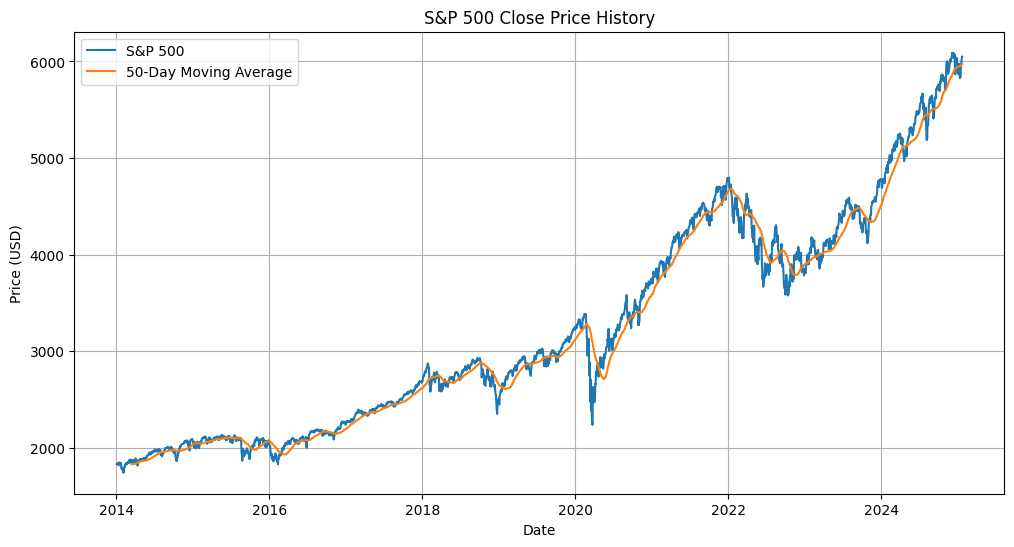

In [28]:
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='S&P 500')
plt.title('S&P 500 Close Price History')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.plot(df['50_MA'], label='50-Day Moving Average')
plt.legend()
plt.grid(True)
plt.show()

In [35]:
sector_df = df_500.groupby(['Date', 'Sector'])['Close'].mean().reset_index()
sector_df['Daily_Change'] = sector_df.groupby('Sector')['Close'].pct_change()
pivot_diff = sector_df.pivot(index='Date', columns='Sector', values='Daily_Change')
print(pivot_diff.head())

Sector      Communication Services  Consumer Discretionary  Consumer Staples  \
Date                                                                           
2014-01-02                     NaN                     NaN               NaN   
2014-01-03               -0.005535               -0.002256         -0.000750   
2014-01-06                0.004421               -0.000482         -0.003495   
2014-01-07                0.007353                0.007559          0.004634   
2014-01-08               -0.007438               -0.000257         -0.003039   

Sector        Energy  Financials  Health Care  Industrials  \
Date                                                         
2014-01-02       NaN         NaN          NaN          NaN   
2014-01-03 -0.004945    0.003388     0.001422     0.004177   
2014-01-06  0.000749   -0.002940    -0.002712    -0.006456   
2014-01-07  0.007332    0.003818     0.013613     0.005854   
2014-01-08 -0.001812    0.000617     0.011133     0.000314   

Sect

In [42]:
df = df.reset_index()  

In [44]:
df.rename(columns={'Date_': 'Date'}, inplace=True)

In [47]:
pivot_change.reset_index()

Sector,Date,Communication Services,Consumer Discretionary,Consumer Staples,Energy,Financials,Health Care,Industrials,Information Technology,Materials,Real Estate,Utilities
0,2014-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2014-01-03,-0.005535,-0.002256,-0.000750,-0.004945,0.003388,0.001422,0.004177,0.000802,-0.000605,0.005586,-0.002036
2,2014-01-06,0.004421,-0.000482,-0.003495,0.000749,-0.002940,-0.002712,-0.006456,-0.006783,-0.006427,0.005732,-0.000206
3,2014-01-07,0.007353,0.007559,0.004634,0.007332,0.003818,0.013613,0.005854,0.013241,0.006149,0.006093,0.009878
4,2014-01-08,-0.007438,-0.000257,-0.003039,-0.001812,0.000617,0.011133,0.000314,0.003416,0.004727,-0.001618,-0.005346
...,...,...,...,...,...,...,...,...,...,...,...,...
2775,2025-01-14,-0.003982,0.008509,-0.003266,0.015138,0.013115,-0.007780,0.014167,0.011386,0.012286,0.005500,0.015559
2776,2025-01-15,0.018302,0.008997,-0.002980,0.023241,0.021156,0.003324,0.006170,0.017603,0.011626,0.003908,0.015304
2777,2025-01-16,-0.004979,0.005785,0.006778,0.010795,0.008097,0.006396,0.012503,-0.000599,0.006817,0.019518,0.026581
2778,2025-01-17,0.011102,0.006684,0.007824,0.009720,0.003925,-0.001963,0.006511,0.005339,0.008767,-0.000959,0.001703


In [52]:
df = df.merge(
    pivot_change,
    how='left',
    left_on='Date',
    right_on='Date'
)


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2780 entries, 2014-01-02 to 2025-01-21
Data columns (total 33 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   index                            2780 non-null   int64  
 1   index_                           2780 non-null   int64  
 2   Close_^GSPC                      2780 non-null   float64
 3   Open_^GSPC                       2780 non-null   float64
 4   Volume_^GSPC                     2780 non-null   int64  
 5   50_MA_                           2731 non-null   float64
 6   RSI_                             2767 non-null   float64
 7   Volatility_                      2780 non-null   float64
 8   200_MA_                          2581 non-null   float64
 9   SP500_return                     2779 non-null   float64
 10  SP500_cum_perf                   2779 non-null   float64
 11  Communication Services           2779 non-null   float64
 12  Co

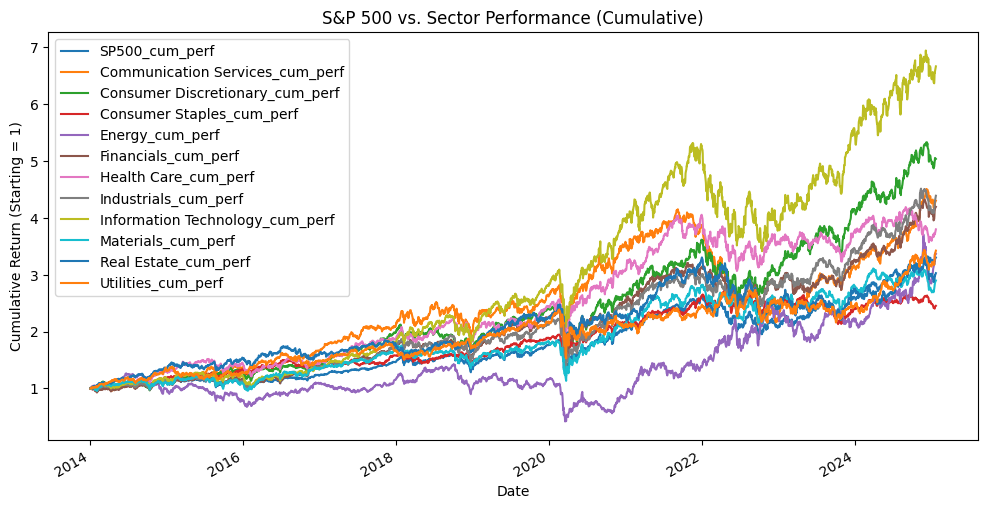

In [ ]:
#  Compute the S&P 500 daily returns from its Close column
#    (assuming your S&P column is e.g. "Close_^GSPC")
df['SP500_return'] = df['Close_^GSPC'].pct_change()

# Create a cumulative performance series for the S&P
#    Starting from 1.0, multiply by (1 + daily_return) each day
df['SP500_cum_perf'] = (1 + df['SP500_return']).cumprod()
sector_cols = [
    "Communication Services",
    "Consumer Discretionary",
    "Consumer Staples",
    "Energy",
    "Financials",
    "Health Care",
    "Industrials",
    "Information Technology",
    "Materials",
    "Real Estate",
    "Utilities"
]

for sector in sector_cols:
    df[f'{sector}_cum_perf'] = (1 + df[sector]).cumprod()

df.set_index('Date', inplace=True)
plot_cols = ['SP500_cum_perf'] + [f'{col}_cum_perf' for col in sector_cols]
df[plot_cols].plot(figsize=(12, 6))
plt.grid(color='lightgrey', linestyle='--', linewidth=0.5)
plt.title("S&P 500 vs. Sector Performance (Cumulative)")
plt.ylabel("Cumulative Return (Starting = 1)")
plt.show()
